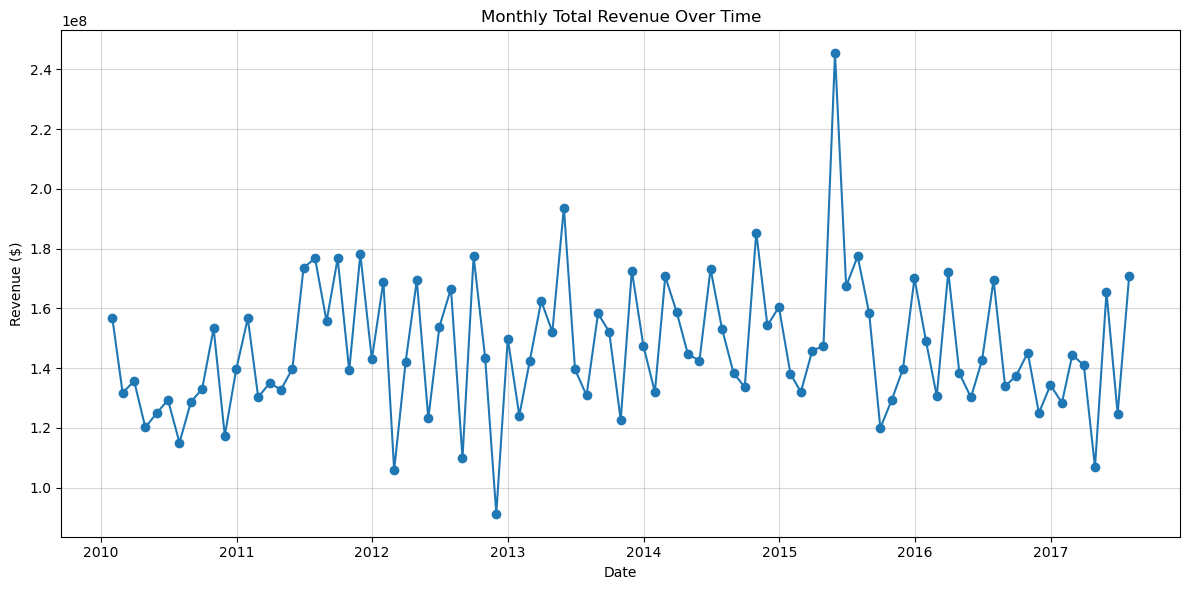

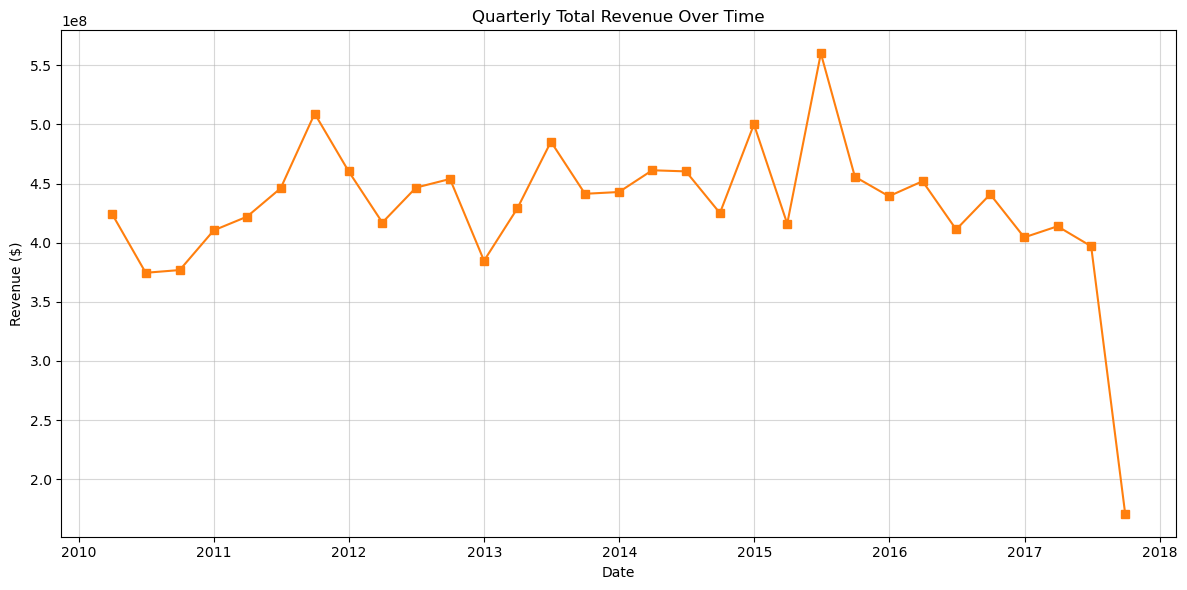

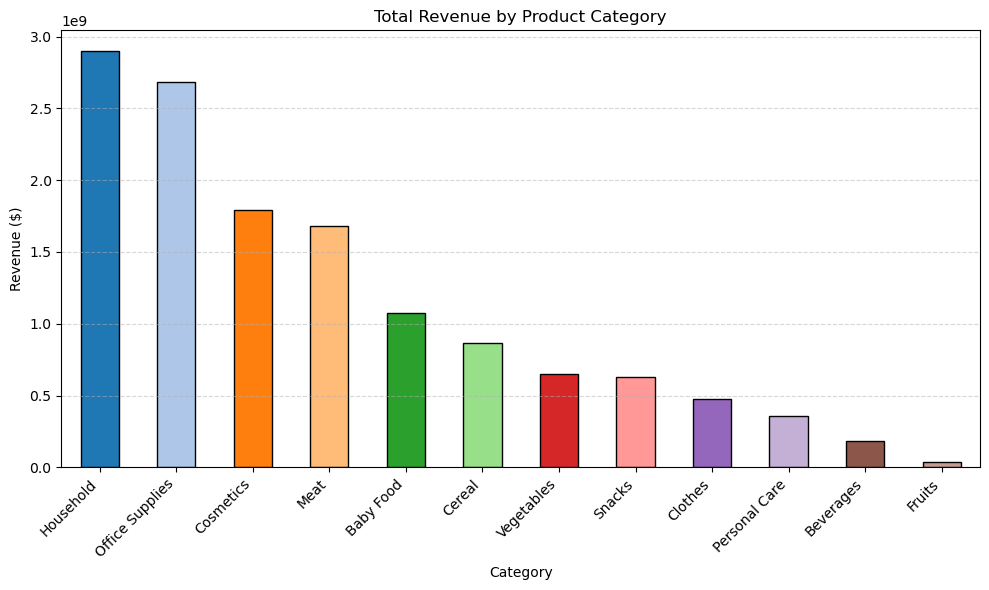

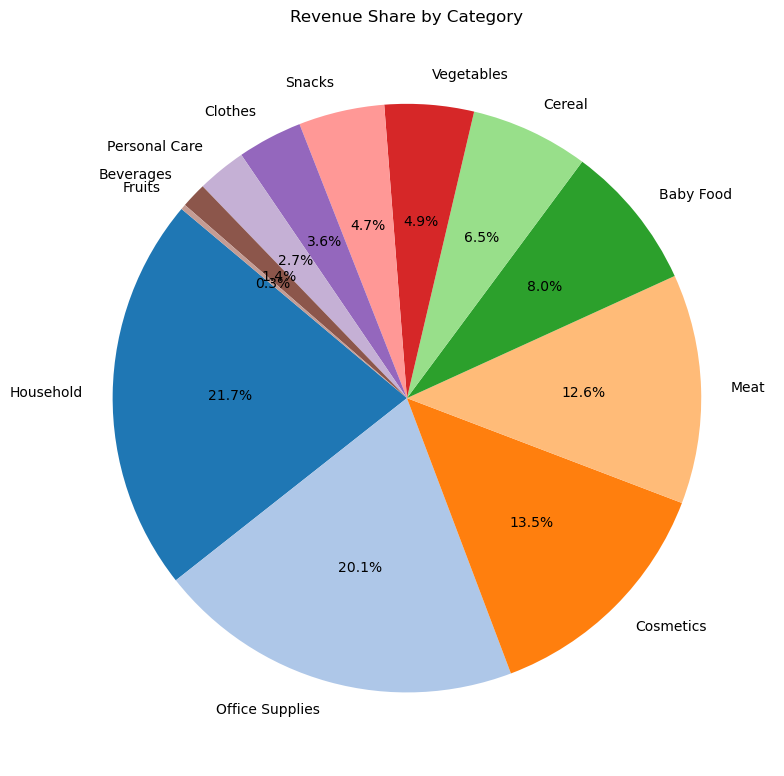


PROJECT SUMMARY
Total Revenue: $13,333,551,314.32
Best Performing Category: Household ($2,898,155,340.81)
Best Performing Month: May 2015

Top 3 Categories:
Item Type
Household          2.898155e+09
Office Supplies    2.683156e+09
Cosmetics          1.793958e+09

Analysis complete. Charts displayed and saved.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os


file_path = r"C:\Users\meetr\OneDrive\Documents\10000 Sales Records.csv"

if not os.path.exists(file_path):
    print(f"Error: File not found at {file_path}")
else:
    df = pd.read_csv(file_path)

    df['Order Date'] = pd.to_datetime(df['Order Date'])
    df.set_index('Order Date', inplace=True)
    df.sort_index(inplace=True)


    monthly_sales = df['Total Revenue'].resample('ME').sum()
    quarterly_sales = df['Total Revenue'].resample('QE').sum()

    plt.figure(figsize=(12, 6))
    plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-', color='#1f77b4')
    plt.title('Monthly Total Revenue Over Time')
    plt.xlabel('Date')
    plt.ylabel('Revenue ($)')
    plt.grid(True, alpha=0.5)
    plt.tight_layout()
    plt.savefig('monthly_sales_line.png')
    plt.show()  

    plt.figure(figsize=(12, 6))
    plt.plot(quarterly_sales.index, quarterly_sales.values, marker='s', linestyle='-', color='#ff7f0e')
    plt.title('Quarterly Total Revenue Over Time')
    plt.xlabel('Date')
    plt.ylabel('Revenue ($)')
    plt.grid(True, alpha=0.5)
    plt.tight_layout()
    plt.savefig('quarterly_sales_line.png')
    plt.show() 

   
    category_sales = df.groupby('Item Type')['Total Revenue'].sum().sort_values(ascending=False)

    plt.figure(figsize=(10, 6))
    if len(category_sales) <= 20:
        colors = plt.cm.tab20.colors
    else:
        colors = plt.cm.get_cmap('viridis', len(category_sales)).colors
        
    category_sales.plot(kind='bar', color=colors, edgecolor='black')
    plt.title('Total Revenue by Product Category')
    plt.xlabel('Category')
    plt.ylabel('Revenue ($)')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.savefig('category_sales_bar.png')
    plt.show()  

    
    plt.figure(figsize=(8, 8))
    plt.pie(category_sales, labels=category_sales.index, autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title('Revenue Share by Category')
    plt.tight_layout()
    plt.savefig('category_share_pie.png')
    plt.show()  

   
    summary = f"""
PROJECT SUMMARY
===============
Total Revenue: ${df['Total Revenue'].sum():,.2f}
Best Performing Category: {category_sales.idxmax()} (${category_sales.max():,.2f})
Best Performing Month: {monthly_sales.idxmax().strftime('%B %Y')}

Top 3 Categories:
{category_sales.head(3).to_string()}
"""
    print(summary)
    with open('summary_report.txt', 'w') as f:
        f.write(summary)
    
    print("Analysis complete. Charts displayed and saved.")